In [1]:

#Import pandas to import a CSV file:
import pandas as pd

pathto = '/Users/hamem/Downloads/prediction-action-bourse/'
dataset = pd.read_csv(pathto+'stock_prices.csv')
dataset = dataset[-200:]


In [2]:

# To get the close price:
dataset = dataset[["Close"]]
print(dataset.head())
#Creating a variable to predict ‘X’ days in the future:
futureDays = 25
#Create a new target column shifted ‘X’ units/days up:
dataset["Prediction"] = dataset[["Close"]].shift(-futureDays)
print(dataset.head())
print(dataset.tail())

           Close
2317  176.889999
2318  183.830002
2319  185.160004
2320  186.050003
2321  187.360001
           Close  Prediction
2317  176.889999  191.699997
2318  183.830002  191.229996
2319  185.160004  192.279999
2320  186.050003  190.699997
2321  187.360001  190.800003
           Close  Prediction
2512  170.889999         NaN
2513  170.179993         NaN
2514  170.800003         NaN
2515  170.419998         NaN
2516  170.929993         NaN


In [3]:
#To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:
import numpy as np
x = np.array(dataset.drop(["Prediction"], 1))[:-futureDays]
print(x)
#To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:
y = np.array(dataset["Prediction"])[:-futureDays]
print(y)


[[176.889999]
 [183.830002]
 [185.160004]
 [186.050003]
 [187.360001]
 [190.039993]
 [188.589996]
 [188.149994]
 [186.440002]
 [188.179993]
 [186.990005]
 [186.309998]
 [187.630005]
 [187.160004]
 [188.360001]
 [188.149994]
 [188.580002]
 [187.899994]
 [187.5     ]
 [186.869995]
 [190.240005]
 [191.830002]
 [193.309998]
 [193.979996]
 [193.460007]
 [191.699997]
 [191.229996]
 [192.279999]
 [190.699997]
 [190.800003]
 [188.839996]
 [188.740005]
 [185.690002]
 [186.5     ]
 [185.460007]
 [184.919998]
 [182.169998]
 [184.429993]
 [184.160004]
 [185.5     ]
 [185.110001]
 [187.179993]
 [183.919998]
 [185.399994]
 [187.970001]
 [190.580002]
 [190.350006]
 [187.880005]
 [191.029999]
 [191.330002]
 [190.910004]
 [191.449997]
 [190.399994]
 [191.880005]
 [191.440002]
 [191.610001]
 [193.      ]
 [194.820007]
 [194.210007]
 [190.979996]
 [189.910004]
 [190.289993]
 [201.5     ]
 [207.389999]
 [207.990005]
 [209.070007]
 [207.110001]
 [207.25    ]
 [208.880005]
 [207.529999]
 [208.869995]
 [209.

In [5]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


In [6]:


# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)


xfuture = dataset.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)


[[174.720001]
 [168.490005]
 [169.600006]
 [168.630005]
 [169.100006]
 [170.949997]
 [165.479996]
 [163.940002]
 [166.070007]
 [160.889999]
 [156.830002]
 [150.729996]
 [146.830002]
 [157.169998]
 [156.149994]
 [156.229996]
 [157.740005]
 [157.919998]
 [142.190002]
 [148.259995]
 [147.929993]
 [150.75    ]
 [153.309998]
 [153.800003]
 [152.289993]]


In [7]:

#To see the model tree prediction
treePrediction = tree.predict(xfuture)
print("Prediction avec Arbre de décision =",treePrediction)


Prediction avec Arbre de décision = [150.       153.070007 156.820007 155.860001 156.820007 153.300003
 157.759995 152.699997 157.759995 156.300003 154.679993 165.25
 166.440002 154.679993 174.179993 174.179993 174.240005 170.940002
 166.440002 169.429993 170.889999 170.179993 170.419998 170.419998
 170.929993]


<ipython-input-9-30c5d8a56d96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


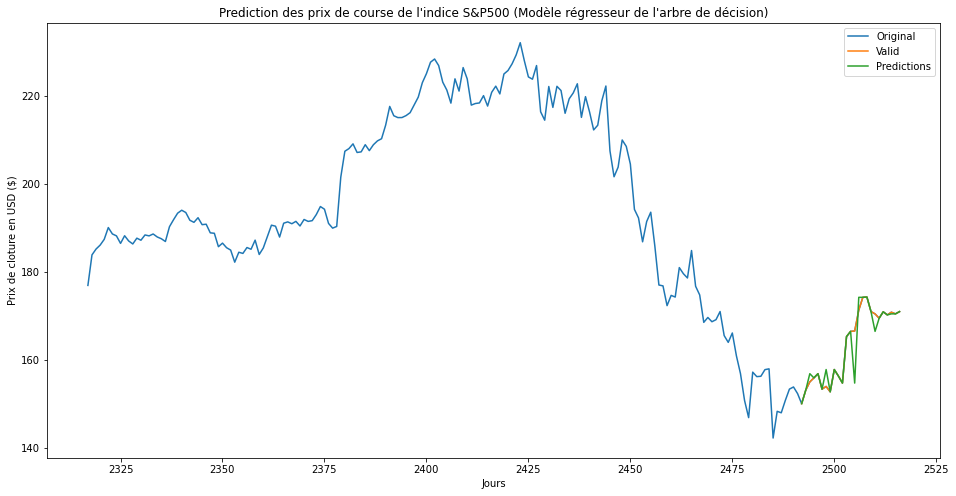

In [9]:

import matplotlib.pyplot as plt
#Visualize decision tree predictions
predictions = treePrediction
valid = dataset[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Prediction des prix de course de l'indice S&P500 (Modèle régresseur de l'arbre de décision)")
plt.xlabel("Jours")
plt.ylabel("Prix de cloture en USD ($)")
plt.plot(dataset["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [12]:
import math  
from sklearn.metrics import mean_squared_error
ypred = tree.predict(xtest)
math.sqrt(mean_squared_error(ytest, ypred)/1000)

0.8466783193027391